In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from IPython.display import Image 
import scipy.stats as sp 
import os 
from scipy import stats
from scipy.stats import poisson
import seaborn as sns
from pylab import * 
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:

#Código para las últimas 6 temporadas
YEARS = range(2010,2022) #Rango 2017-22


#la función for nos arroja el rango de años que queremos utilizar 
#usaremos la función append para unir la información y ordenarla por año
data = pd.DataFrame()

for i in YEARS:  
    i_data = pd.read_csv('https://github.com/nflverse/nflverse-data/releases/download/pbp/' \
                   'play_by_play_' + str(i) + '.csv.gz',
                   compression= 'gzip', low_memory= False)
    data = data.append(i_data, sort=True)
    
    

data.head(1)

,aborted_play,air_epa,air_wpa,air_yards,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,...,xyac_median_yardage,xyac_success,yac_epa,yac_wpa,yardline_100,yards_after_catch,yards_gained,ydsnet,ydstogo,yrdln
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,LA 30


In [3]:
#Temporada actual
YEARS = range(2022,2023) #Rango 2017-22


#la función for nos arroja el rango de años que queremos utilizar 
#usaremos la función append para unir la información y ordenarla por año
data1 = pd.DataFrame()

for i in YEARS:  
    i_data = pd.read_csv('https://github.com/nflverse/nflverse-data/releases/download/pbp/' \
                   'play_by_play_' + str(i) + '.csv.gz',
                   compression= 'gzip', low_memory= False)
    data1 = data1.append(i_data, sort=True)
    
    

data1.head(1)

,aborted_play,air_epa,air_wpa,air_yards,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,...,xyac_median_yardage,xyac_success,yac_epa,yac_wpa,yardline_100,yards_after_catch,yards_gained,ydsnet,ydstogo,yrdln
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,BAL 35


In [17]:
data = data.append(data1, sort=True)

#Limpiamos el dataset para que "scrambles" cuenten como jugadas de pase y no como acarreos
data.loc[data['pass']==1, 'play_type'] = 'pass'
data.loc[data.rush==1, 'play_type'] = 'run'

In [4]:
jimmy = data[(data['pass']==1)&
             (data.pass_length=='deep')].groupby(['passer',
                                                  'passer_id']).agg(plays=('play_id', 'count'),
                                                                           complete= ('complete_pass', 'mean'),
                                                                           air_yards= ('air_yards', 'sum'),
                                                                           yards = ('passing_yards', 'sum'),
                                                                           td = ('pass_touchdown', 'sum'),
                                                                           int_= ('interception', 'sum'),
                                                                           qb_epa= ('qb_epa', 'mean')).reset_index().sort_values(by='qb_epa', ascending=False).round(2)


jimmy = jimmy[jimmy.plays>100].reset_index(drop=True)

jimmy.index = jimmy.index+1



jimmy.head(15)

,passer,passer_id,plays,complete,air_yards,yards,td,int_,qb_epa
1,J.Herbert,00-0036355,210,0.47,5416.0,2929.0,22.0,13.0,0.70
2,D.Brees,00-0020531,1134,0.50,27997.0,16504.0,116.0,68.0,0.68
3,P.Mahomes,00-0033873,522,0.43,13590.0,6892.0,50.0,20.0,0.67
4,A.Rodgers,00-0023459,1313,0.42,33950.0,17390.0,125.0,38.0,0.66
5,R.Wilson,00-0029263,1116,0.44,29896.0,14822.0,122.0,46.0,0.66
6,T.Romo,00-0021678,432,0.45,10945.0,5724.0,51.0,20.0,0.64
7,D.Watson,00-0033537,360,0.48,9416.0,5061.0,40.0,22.0,0.63
8,D.Prescott,00-0033077,511,0.45,12682.0,6647.0,50.0,21.0,0.61
9,G.Minshew II,00-0035289,138,0.46,3388.0,1830.0,11.0,4.0,0.60
10,J.Burrow,00-0036442,183,0.43,4649.0,2355.0,18.0,10.0,0.57


In [ ]:
pases = data[(data.season_type=='REG')&
             ((data.play_type== 'pass')&
             (data['two_point_attempt']==0))]

pases.loc[pases.sack==1, 'pass_attempt']=0

df_season = pases.groupby(['passer',
                           'passer_id',
                           'posteam',
                           'season']).agg(
    games = ('game_id', 'nunique'),
    plays =('play_id','count'),
    att = ('pass_attempt', 'sum'),
    complete = ('complete_pass', 'sum'),
    comp_pct = ('complete_pass', 'mean'),
    cpoe = ('cpoe', 'mean'),
    air_yards = ('air_yards', 'sum'),
    adot = ('air_yards', 'mean'),
    pass_yards = ('passing_yards', 'sum'),
    yac = ('yards_after_catch', 'sum'),
    yac_pass = ('yards_after_catch', 'mean'),
    pass_td = ('pass_touchdown', 'sum'),
    pass_td_pct = ('pass_touchdown', 'mean'),
    first_down_pass = ('first_down_pass', 'sum'),
    first_down_pct = ('first_down_pass', 'mean'),
    interception = ('interception', 'sum'),
    int_pct = ('interception', 'mean'),
    sacks = ('sack', 'sum'),
    sack_pct = ('sack', 'mean'),
    fumbles = ('fumble', 'sum'),
    fumbles_pct = ('fumble', 'mean'),
    fumbles_lost = ('fumble_lost', 'sum'),
    net_yards_att = ('yards_gained', 'mean'),
    total_epa = ('qb_epa', 'sum'),
    epa_play = ('qb_epa', 'mean'),
    air_epa = ('air_epa', 'mean'),
    yac_epa = ('yac_epa', 'mean'),
    succesful_plays = ('success', 'sum'),
    success_pct = ('success', 'mean')).reset_index().sort_values(by=['season', 
                                    'pass_yards'], ascending=[True, 
                                                              False]).round(3)

df_season['comp_pct']= df_season['comp_pct']*100
df_season['pass_td_pct']= df_season['pass_td_pct']*100
df_season['first_down_pct']= df_season['first_down_pct']*100
df_season['int_pct']= df_season['int_pct']*100
df_season['sack_pct']= df_season['sack_pct']*100
df_season['fumbles_pct']= df_season['fumbles_pct']*100
df_season['success_pct']= df_season['success_pct']*100




df_season = df_season.reset_index(drop=True)



Text(210, -163.072, 'QBs con al menos 200 dropbacks\nQB promedio= 100 EPA Index')

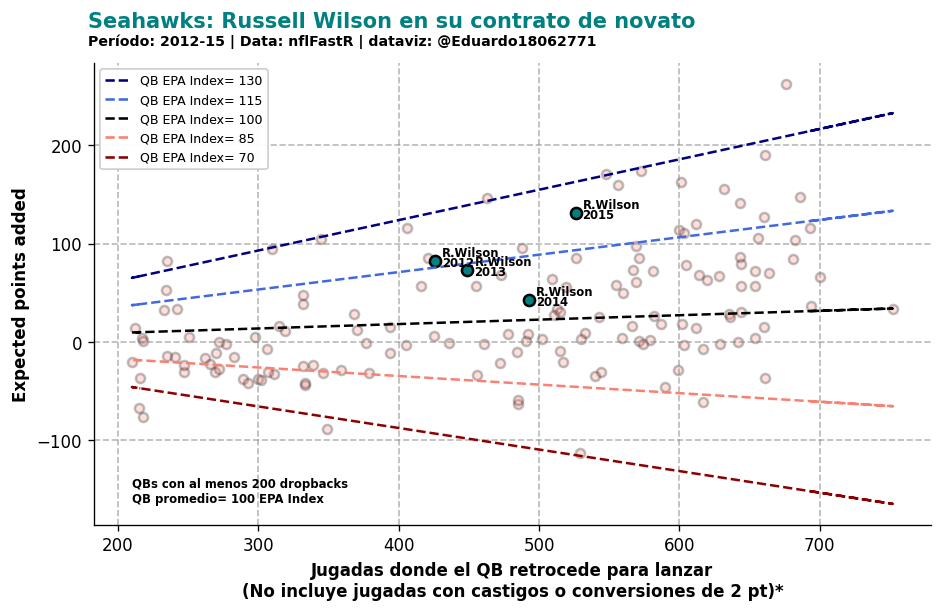

In [18]:
#Figura donde se insertara la grafica
fig = plt.style.use('default')
fig= plt.figure(figsize= (9,5), dpi= 120)
ax= plt.subplot(111, facecolor= "white")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(lw = 1, color = "grey", ls='--', alpha=0.55)


#Filtros deseados
df = df_season[(df_season.season.isin([2012, 2013, 2014, 2015]))&(df_season.plays>200)]

x = df.plays
y = df.total_epa
m = df.epa_play.mean()
std = df.epa_play.std()

#Barra de dos desviaciones estándar por encima del promedio
ax.plot(x, x*(m+std*2), ls='--', lw=1.5, color='navy')

#Barra de una desviación estándar por encima del promedio
ax.plot(x, x*(m+std), ls='--', lw=1.5, color='royalblue')

#Barra de media por intento
ax.plot(x, x*(m), ls='--', lw=1.5, color='black')

#Barra de una desviación por debajo del promedio
ax.plot(x, x*(m-std), ls='--', lw=1.5, color='salmon')

#Barra de dos deviaciones estándar por debajo del promedio
ax.plot(x, x*(m-std*2), ls='--', lw=1.5, color='darkred')

#Todos los qbs con al menos 300 dropbacks
ax.scatter(x,y,c='salmon',ec='black',s=30,alpha=0.25, lw=1.5)

ax.set_ylabel('Expected points added', 
              fontweight='bold')
ax.set_xlabel('Jugadas donde el QB retrocede para lanzar\n(No incluye jugadas con castigos o conversiones de 2 pt)*', 
              fontweight='bold')

#QBs que queremos resaltar

df1 = df[df.posteam.isin(['SEA'])]


z =  df1['passer'].reset_index(drop=True)
z1 =  df1['season'].reset_index(drop=True)
x1 = df1['plays'].reset_index(drop=True)
y1 = df1['total_epa'].reset_index(drop=True)


#Título del gráfico
ax.text(df.plays.min()*0.85, 
        y.max()*1.22, 
        s='Seahawks: Russell Wilson en su contrato de novato', 
        fontsize=12.5, 
        fontweight='bold', 
        color='teal')

#Título del gráfico
ax.text(df.plays.min()*0.85, 
        y.max()*1.15, 
        s='Período: 2012-15 | Data: nflFastR | dataviz: @Eduardo18062771', 
        fontsize=8.5, 
        fontweight='bold', 
        color='black')

for i, text in enumerate(z):
    ax.annotate(text, (x1[i]+5, y1[i]+5),fontweight='bold', fontsize=7)



for i, text in enumerate(z1):
    ax.annotate(text, (x1[i]+5, y1[i]-5),fontweight='bold', fontsize=7)
    

ax.scatter(x1,y1, color='teal', ec='black', s=45, lw=1.5)


    

legend =ax.legend(['QB EPA Index= 130',
                   'QB EPA Index= 115',
                   'QB EPA Index= 100',
                   'QB EPA Index= 85',
                   'QB EPA Index= 70'],
          ncol = 1, 
          frameon = True, 
          fontsize = 7.5)
plt.gca().add_artist(legend)


ax.text(df.plays.min(),df.total_epa.min()-50, 
        s='QBs con al menos 200 dropbacks\nQB promedio= 100 EPA Index', 
        fontsize=7, 
        fontweight='bold')


In [9]:
wopr = pases[pases.sack==0]

game_id = pases.groupby(['game_id','posteam']).agg(
    team_tgt=('pass_attempt','sum'),
    team_ay= ('air_yards', 'sum'))

wopr = wopr.groupby(['receiver', 
                     'receiver_id',
                     'game_id',
                     'posteam',
                     'season']).agg(
    target= ('pass_attempt','sum'),
    air_yds = ('air_yards', 'sum'),
    exp_rec = ('cp', 'sum'),
    rec_oe= ('cpoe', 'mean'),
    rec= ('complete_pass', 'sum'),
    yards = ('receiving_yards', 'sum'),
    td= ('pass_touchdown', 'sum'),
    fumble= ('fumble', 'sum'),
    fumble_lost= ('fumble_lost','sum')).reset_index()

wopr = wopr.merge(game_id, on=['game_id', 'posteam'], how='left')


wopr = wopr.groupby(['receiver',
                     'receiver_id',
                     'posteam',
                     'season']).agg(
    games= ('game_id', 'count'),
    team_tgt= ('team_tgt', 'sum'),
    team_ay= ('team_ay','sum'),
    target= ('target', 'sum'),
    air_yards=('air_yds','sum'),
    exp_rec = ('exp_rec', 'sum'),
    rec= ('rec', 'sum'),
    yards = ('yards', 'sum'),
    td = ('td', 'sum'),
    fumble= ('fumble', 'sum'),
    fumble_lost= ('fumble_lost', 'sum')).reset_index()

wopr['target_ms']= wopr.target/wopr.team_tgt
wopr['air_yards_ms']= wopr.air_yards/wopr.team_ay
wopr['wopr']= wopr.target_ms*1.5+wopr.air_yards_ms*0.7
wopr['std_fantasy']= wopr.yards*0.1+wopr.td*6-wopr.fumble_lost*2

wopr[(wopr.target_ms<0.15)&(wopr.air_yards_ms>0.25)&(wopr.season<2022)&(wopr.games>12)].sort_values(by='std_fantasy',ascending=False).round(2).reset_index(drop=True)

,receiver,receiver_id,posteam,season,games,team_tgt,team_ay,target,air_yards,exp_rec,rec,yards,td,fumble,fumble_lost,target_ms,air_yards_ms,wopr,std_fantasy
0,M.Williams,00-0033536,LAC,2018,15,486.0,3726.0,66.0,974.0,35.50,43.0,664.0,10.0,0.0,0.0,0.14,0.26,0.39,126.4
1,S.Watkins,00-0031325,LA,2017,15,482.0,3804.0,70.0,1009.0,39.59,39.0,593.0,8.0,0.0,0.0,0.15,0.27,0.40,107.3
2,M.Valdes-Scantling,00-0034272,GB,2020,14,469.0,3713.0,63.0,1153.0,35.03,33.0,690.0,6.0,1.0,1.0,0.13,0.31,0.42,103.0
3,T.Ginn,00-0025396,NO,2017,15,497.0,3223.0,70.0,842.0,43.29,53.0,787.0,4.0,0.0,0.0,0.14,0.26,0.39,102.7
4,C.Sutton,00-0034348,DEN,2018,16,586.0,4396.0,84.0,1178.0,45.72,42.0,704.0,4.0,1.0,0.0,0.14,0.27,0.40,94.4
5,D.Peoples-Jones,00-0036233,CLE,2021,13,391.0,3213.0,58.0,904.0,32.60,34.0,597.0,3.0,1.0,1.0,0.15,0.28,0.42,75.7
6,D.Moore,00-0033589,SEA,2018,14,360.0,3302.0,53.0,839.0,26.94,26.0,445.0,5.0,4.0,0.0,0.15,0.25,0.40,74.5
7,M.Floyd,00-0022414,LAC,2015,15,636.0,4560.0,69.0,1387.0,32.17,30.0,561.0,3.0,1.0,1.0,0.11,0.30,0.38,72.1
8,D.Avery,00-0026173,KC,2013,15,512.0,3390.0,72.0,863.0,42.96,40.0,596.0,2.0,1.0,1.0,0.14,0.25,0.39,69.6
9,N.Agholor,00-0031549,NE,2021,14,450.0,3625.0,64.0,914.0,36.44,37.0,473.0,3.0,0.0,0.0,0.14,0.25,0.39,65.3


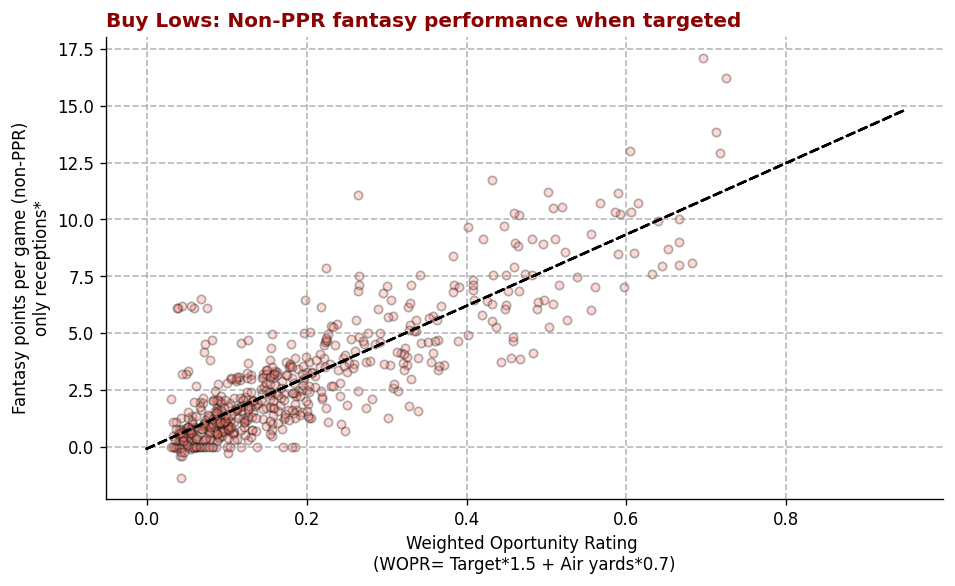

In [16]:
#Figura donde se insertara la grafica
fig = plt.style.use('default')
fig= plt.figure(figsize= (9,5), dpi= 120)
ax= plt.subplot(111, facecolor= "white")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(lw = 1, color = "grey", ls='--', alpha=0.55)

data1 = wopr[(wopr.target/wopr.games>0.5)]

ay = data1.wopr
yds = data1.std_fantasy/data1.games

split= data1[data1.season>2021]
ay_split= split.wopr
std_fan = split.std_fantasy/split.games

cax = ax.scatter(ay_split, std_fan, s=25, c='salmon', ec='black',alpha=0.30)


m, b = np.polyfit(ay, yds, 1)
ax.plot(ay,(ay*m+b),ls='--', lw=1.5,color='black')
ax.set_title(loc='left',
             fontsize=12,
             fontweight='bold',
             label='Buy Lows: Non-PPR fantasy performance when targeted',
             color='darkred')
ax.set_ylabel('Fantasy points per game (non-PPR)\nonly receptions*')
ax.set_xlabel('Weighted Oportunity Rating \n(WOPR= Target*1.5 + Air yards*0.7)')

#split

split = data1[((data1.wopr*m+b)>(data1.std_fantasy/data1.games))&
              (data1.wopr>=0.5)&
              (data1.season==2022)]

z= split['receiver'].reset_index(drop=True)
x1 = split['wopr'].reset_index(drop=True)
y1= (split['std_fantasy']/split['games']).reset_index(drop=True)

ax.scatter(x1, y1, s=45, color='red', ec='black', lw=1.5)

for i, text in enumerate(z):
    ax.annotate(text, (x1[i]+0.01, y1[i]-0.25),fontweight='bold', fontsize=7)


In [11]:
data['red_zone']= np.where(((data.play_type=='run')&(data['yardline_100']>=80)),1,0)

rushes = data[(data.season_type=='REG')&
              (data.play_type.isin(['run', 'pass']))].groupby(['rusher',
                                                               'rusher_id',
                                                               'posteam',
                                                               'season']).agg(games=('game_id', 'nunique'),
                                                                              att= ('rush', 'sum'),
                                                                              rushing_yards= ('rushing_yards', 'sum'),
                                                                              rushing_td= ('rush_touchdown', 'sum'),
                                                                              r_first_down = ('first_down_rush', 'sum'),
                                                                              fumbles = ('fumble', 'sum'),
                                                                              fumbles_lost = ('fumble_lost', 'sum'),
                                                                              red_zone = ('red_zone', 'sum'),
                                                                              g2g = ('goal_to_go', 'sum'),
                                                                              epa = ('epa', 'mean'),
                                                                              success= ('success', 'mean')).reset_index().sort_values(by=['season',
                                                                                                                                          'rushing_yards'], ascending=[True, False]).round(2)


rushes['fantasy_r']= rushes.rushing_yards*0.1+rushes.rushing_td*6-(rushes.fumbles_lost*2)

rushes

,rusher,rusher_id,posteam,season,games,att,rushing_yards,rushing_td,r_first_down,fumbles,fumbles_lost,red_zone,g2g,epa,success,fantasy_r
123,A.Foster,00-0026796,HOU,2010,16,332,1616.0,16.0,89.0,3.0,2.0,48,36,0.02,0.45,253.6
1808,J.Charles,00-0026213,KC,2010,16,239,1467.0,5.0,70.0,2.0,1.0,27,10,0.14,0.46,174.7
3090,M.Turner,00-0022821,ATL,2010,16,347,1371.0,12.0,71.0,2.0,2.0,49,38,-0.05,0.36,205.1
739,C.Johnson,00-0026164,TEN,2010,16,330,1364.0,11.0,55.0,2.0,2.0,62,25,-0.15,0.33,198.4
2913,M.Jones-Drew,00-0024275,JAX,2010,14,306,1324.0,5.0,75.0,2.0,2.0,29,24,-0.03,0.42,158.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,D.Carter,00-0031763,LAC,2022,1,1,-5.0,0.0,0.0,0.0,0.0,0,0,-1.24,0.00,-0.5
1522,E.Moore,00-0036980,NYJ,2022,1,1,-6.0,0.0,0.0,0.0,0.0,0,0,-1.63,0.00,-0.6
511,B.Perriman,00-0032054,TB,2022,2,2,-7.0,0.0,0.0,1.0,0.0,0,0,-1.79,0.00,-0.7
1879,J.Dotson,00-0037741,WAS,2022,1,1,-10.0,0.0,0.0,0.0,0.0,0,0,-1.46,0.00,-1.0


Text(0.5, 0, 'Número de juego')

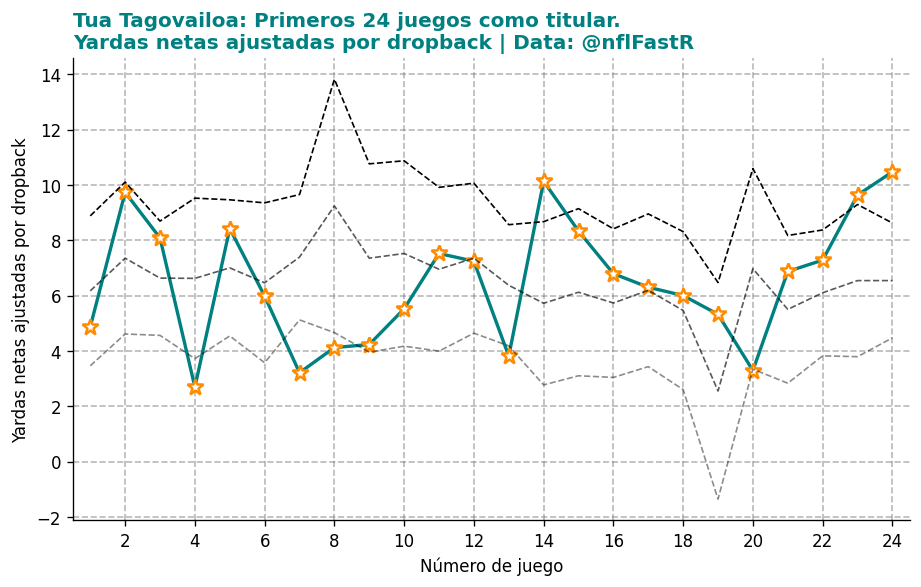

In [166]:
# AY/A moving average X games

df2 = data[(data.season_type=='REG')].groupby(['passer',
                                              'passer_id',
                                              'game_date',
                                              'defteam',
                                              'season']).agg(dropbacks = ('pass_attempt', 'sum'),
                                                              pass_yards = ('passing_yards', 'sum'),
                                                              net_pass_yards = ('yards_gained', 'sum'),
                                                              pass_td = ('pass_touchdown', 'sum'),
                                                              pass_int= ('interception', 'sum'),
                                                              sacks= ('sack', 'sum')).reset_index()



df2['Adj_net_yards_att']= (df2.net_pass_yards+df2.pass_td*20-df2.pass_int*45)/(df2.dropbacks)



df2['median']= df2[df2.dropbacks>14].groupby('game_date')['Adj_net_yards_att'].transform(pd.Series.median)
df2['std']= df2[df2.dropbacks>14].groupby('game_date')['Adj_net_yards_att'].transform(pd.Series.std)

df2['ay_ls']= df2['median']+df2['std']
df2['ay_li']= df2['median']-df2['std']

df2 = df2.round(2)

#QB a analizar

qb = ['T.Tagovailoa']



#Para la grafica

rookie = df2[(df2.passer.isin(qb))&(df2.game_date>='2020-11-01')&(df2.dropbacks>14)].head(24).reset_index(drop=True)
rookie.index = rookie.index+1

#Figura donde se insertara la grafica
fig = plt.style.use('default')
fig= plt.figure(figsize= (9,5), dpi= 120)
ax= plt.subplot(111, facecolor= "white")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(lw = 1, color = "grey", ls='--', alpha=0.55)

x = rookie.index
y = rookie['Adj_net_yards_att']

y_ls = rookie['ay_ls'] 
med = rookie['median']
y_li = rookie['ay_li']

ax.plot(x,y, lw=2,color='teal', mfc='white', mec='darkorange', marker='*',mew=1.5, ms=10)
ax.plot(x,y_ls, ls='--', lw=1, color='black',)
ax.plot(x,med, ls='--', lw=1, color='black', alpha=0.65)
ax.plot(x,y_li, ls='--', lw=1, color='black', alpha=0.45)

ax.set_xticks(np.arange(0,26,2))
ax.set_xlim(0.5,24.5)

ax.set_title('Tua Tagovailoa: Primeros 24 juegos como titular.\nYardas netas ajustadas por dropback | Data: @nflFastR',
             loc='left',
             fontsize=12,
             fontweight='bold',
             color='teal')

ax.set_ylabel('Yardas netas ajustadas por dropback')
ax.set_xlabel('Número de juego')

In [17]:
# Expected receiving yards vs receiving yards

df3 = data[(data.play_type=='pass')&
           (data.pass_attempt==1)&
           (data.season_type=='REG')]

df3['exp_rec_yds'] = df3['cp']*df3['air_yards']+ df3['xyac_median_yardage']

exp = df3.groupby(['receiver_id', 
                   'receiver',
                   'game_date',
                   'season',
                   'posteam',
                   'defteam']).agg(target = ('pass_attempt', 'sum'),
                                   air_yds = ('air_yards', 'sum'),
                                   exp_yac = ('xyac_median_yardage', 'sum'),
                                   exp_cp = ('cp', 'sum'),
                                   exp_rec_yds = ('exp_rec_yds', 'sum'),
                                   rec = ('complete_pass', 'sum'),
                                   rec_yards = ('receiving_yards', 'sum')).reset_index().round(1)


In [153]:
exp.loc[exp['receiver_id']=='00-0033040', 'receiver']='Ty.Hill'

(4.75, 54.0)

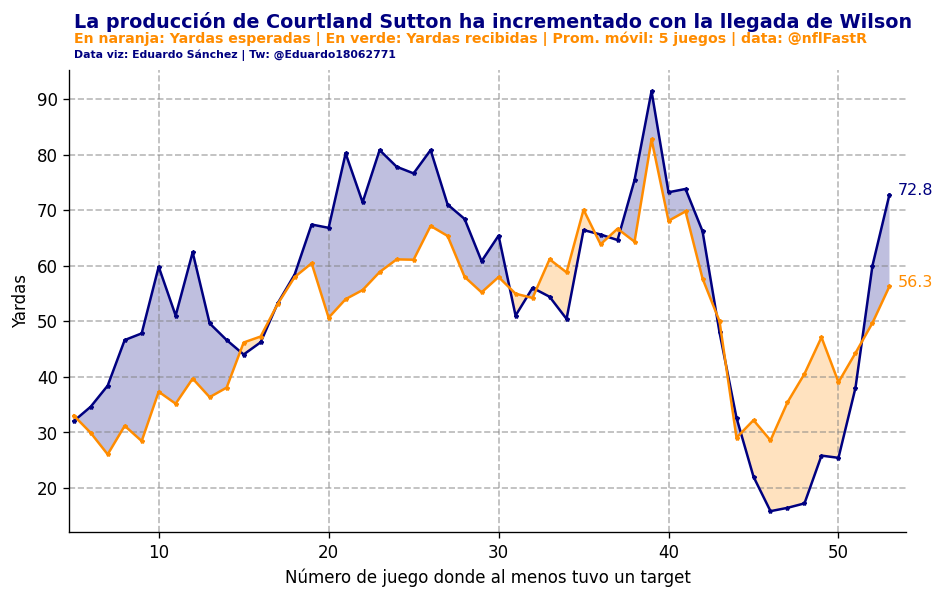

In [180]:
#Figura donde se insertara la grafica
fig = plt.style.use('default')
fig= plt.figure(figsize= (9,5), dpi= 120)
ax= plt.subplot(111, facecolor= "white")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(lw = 1, color = "grey", ls='--', alpha=0.55)


rec = exp[(exp.receiver=='C.Sutton')].sort_values(by='game_date')

exp_y = rec.groupby('receiver')['exp_rec_yds'].rolling(window=5).mean()
yds = rec.groupby('receiver')['rec_yards'].rolling(window=5).mean()

exp_y = exp_y[~(np.isnan(exp_y))].reset_index(drop=True)
yds = yds[~(np.isnan(yds))].reset_index(drop=True)
x = pd.Series(range(len(exp_y)))+5

ax.plot(x, yds, marker='*', ms=2.5, color='navy')
ax.plot(x, exp_y, marker='*', ms=2.5, color='darkorange')


ax.fill_between(x,
                exp_y, 
                yds, where= exp_y< yds,
                facecolor= 'navy', 
                alpha=0.25,
                interpolate=True)
ax.fill_between(x,
                exp_y, 
                yds, 
                where= exp_y>=yds,
                facecolor='darkorange', 
                alpha=0.25,
                interpolate=True)


ax.text(x.iloc[-1]+0.5, yds.iloc[-1]-0.1, s=yds.iloc[-1].round(1), fontsize=9.5, color='navy')
ax.text(x.iloc[-1]+0.5, exp_y.iloc[-1]-0.1, s=exp_y.iloc[-1].round(1), fontsize=9.5, color='darkorange')

ax.text(5, 
        np.where(yds.max()>exp_y.max(), yds.max()*1.125, exp_y.max()*1.125),
        s= 'La producción de Courtland Sutton ha incrementado con la llegada de Wilson',
        color='navy',
        fontsize=11.5,
        fontweight='bold')


ax.text(5, 
        np.where(yds.max()>exp_y.max(), yds.max()*1.095, exp_y.max()*1.095),
        s= 'En naranja: Yardas esperadas | En verde: Yardas recibidas | Prom. móvil: 5 juegos | data: @nflFastR',
        color='darkorange',
        fontsize=8.5,
        fontweight='bold')


ax.text(5, 
        np.where(yds.max()>exp_y.max(), yds.max()*1.065, exp_y.max()*1.065),
        s= 'Data viz: Eduardo Sánchez | Tw: @Eduardo18062771',
        color='navy',
        fontsize=6.5,
        fontweight='bold')


ax.set_xlabel('Número de juego donde al menos tuvo un target')
ax.set_ylabel('Yardas')

ax.set_xlim(4.75, x.max()+1)